LSTM Autoencoders - Composite

To achieve the architecture of autoencoders, I'll use encoder and decoder by input reconstruction and future prediction, based on the learned representation.

In [23]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import Input
from keras.models import Model

#define input sequence

sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#size of sequence

n_in = len(sequence)

#reshape into [samples, timesteps, features]

sequence = sequence.reshape((1, n_in, 1))

#out sequence
seq_out = sequence[:, 1:, :]
n_out = n_in - 1

In [4]:
def modelAutoencoder():
  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
  model.add(RepeatVector(n_in))
  model.add(LSTM(100, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(1)))
  model.compile(optimizer='adam', loss='mse')

  return model

In [5]:
model = modelAutoencoder()

model.fit(sequence, sequence, epochs=300, verbose=0)

In [6]:
yhat = model.predict(sequence, verbose=0)

In [7]:
#predictions
yhat

array([[[0.10400528],
        [0.19987711],
        [0.29914021],
        [0.39940515],
        [0.49988398],
        [0.6002499 ],
        [0.7003454 ],
        [0.80016935],
        [0.8998605 ]]], dtype=float32)

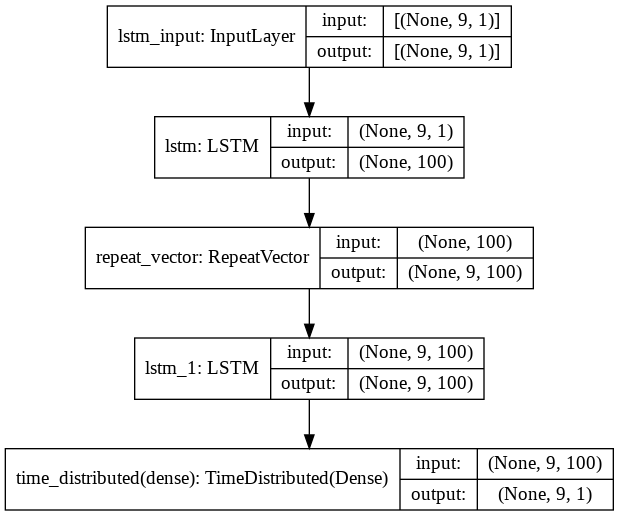

In [8]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')

Now it is time of we use the composite model of autoencoders on LSTM

In [24]:
def modelComposite():
  #defining the encoder
  visible = Input(shape=(n_in, 1))
  encoder = LSTM(100, activation='relu')(visible)

  # define reconstruct decoder
  decoder1 = RepeatVector(n_in)(encoder)
  decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
  decoder1 = TimeDistributed(Dense(1))(decoder1)

  # define predict decoder
  decoder2 = RepeatVector(n_out)(encoder)
  decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
  decoder2 = TimeDistributed(Dense(1))(decoder2)

  model = Model(inputs=visible, outputs=[decoder1, decoder2])
  model.compile(optimizer='adam', loss='mse')

  return model


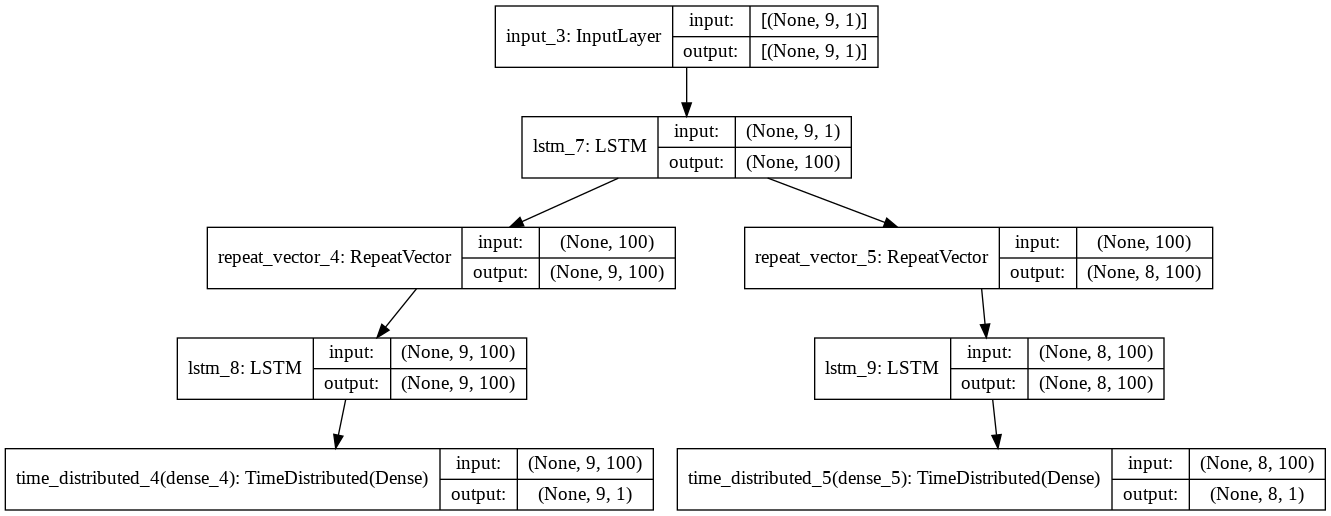

In [25]:
modelAEComposite = modelComposite()

plot_model(modelAEComposite, show_shapes=True, to_file='composite_lstm_autoencoder.png')

In [28]:
#fit the model over seq_in and seq_out

modelAEComposite.fit(sequence, [sequence, seq_out], epochs=300, verbose=0)

yhat = model.predict(sequence, verbose=0)
print(yhat)

[[[0.10400528]
  [0.19987711]
  [0.29914021]
  [0.39940515]
  [0.49988398]
  [0.6002499 ]
  [0.7003454 ]
  [0.80016935]
  [0.8998605 ]]]
